# Human Resources Analytics 
****
Every year, around 15% of a company employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons:

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

**Goals:**
- Find out what factors the company should focus on, in order to curb attrition;
- Model the probability of attrition.

The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

## Loading Libraries and Data

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

### Metadata

In [2]:
dic = pd.read_excel('data_dictionary.xlsx')

In [3]:
dic.head()

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN


### Employee Survey Data

In [4]:
emp_survey = pd.read_csv('employee_survey_data.csv')

In [5]:
emp_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


### Manager Survey Data

In [6]:
mng_survey = pd.read_csv('manager_survey_data.csv')

In [7]:
mng_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


### General Data

In [8]:
gen_data = pd.read_csv('general_data.csv')

In [9]:
gen_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


### In and Out Time Data

In [10]:
in_time = pd.read_csv('in_time.csv')

In [11]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [12]:
out_time = pd.read_csv('out_time.csv')

In [13]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


## Exploratory Data Analysis - Part 1

### Metadata

In [14]:
dic

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


### General Data

#### Data Head

In [15]:
gen_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


#### Data Info

In [16]:
gen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [17]:
gen_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

- There are some missing data to deal later

In [18]:
gen_data.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

In [19]:
any(gen_data.duplicated())

False

#### Data Distribution

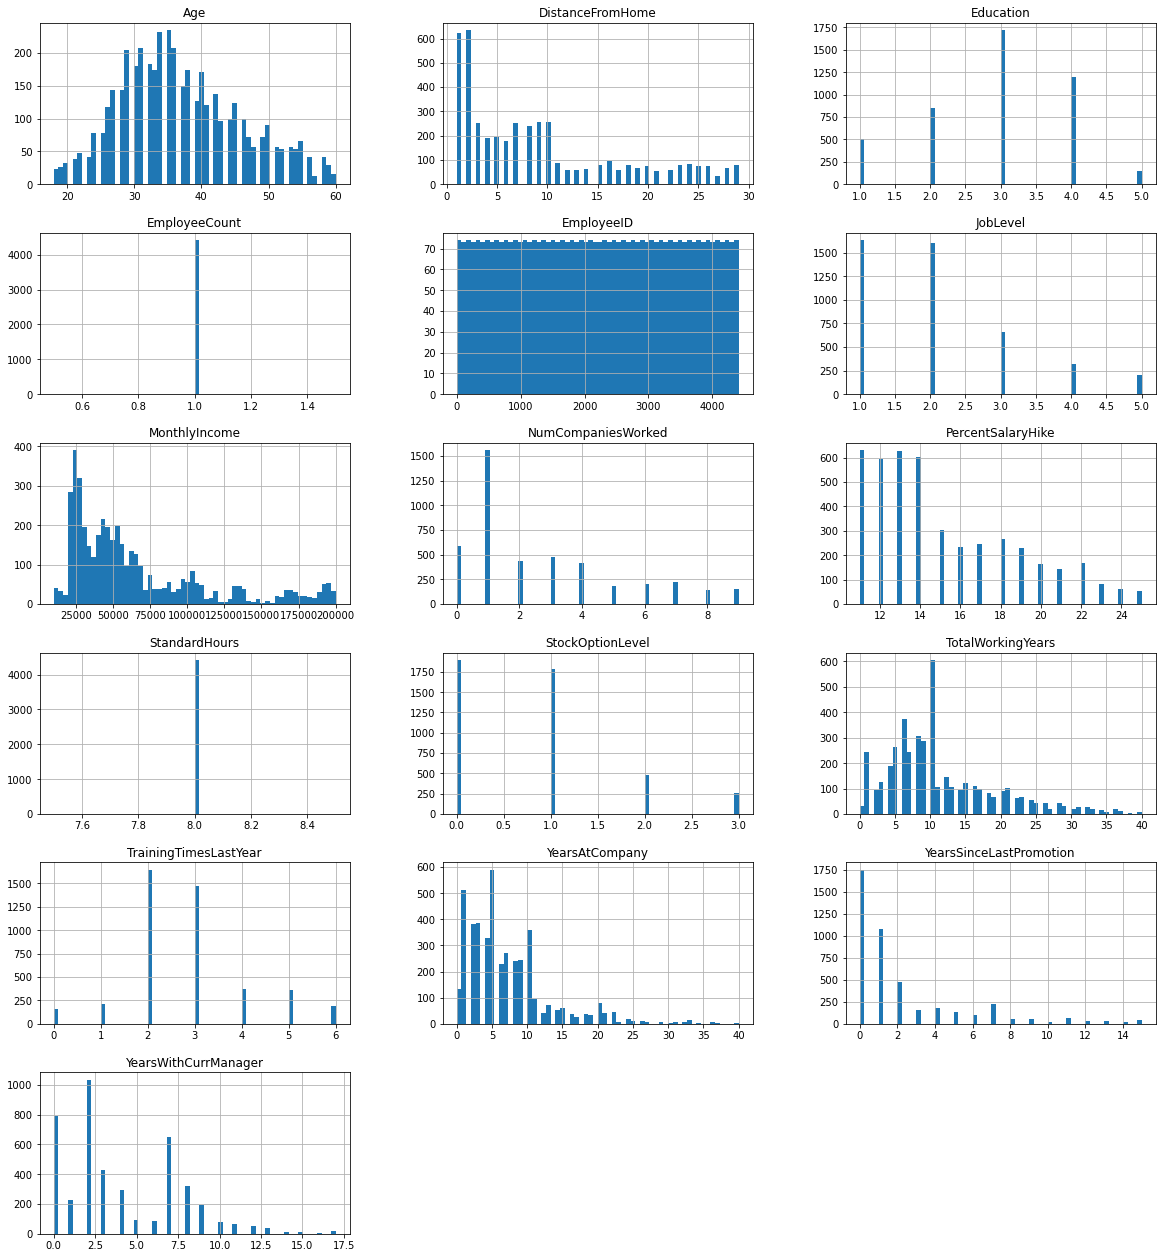

In [20]:
gen_data.hist(figsize = (20,30), layout = (8,3), bins = 60)
plt.show()

In [21]:
round(gen_data.describe(), 2)

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.00,4410.00,4410.00,4410.0,4410.00,4410.00,4410.00,4391.00,4410.00,4410.0,4410.00,4401.00,4410.00,4410.00,4410.00,4410.00
mean,36.92,9.19,2.91,1.0,2205.50,2.06,65029.31,2.69,15.21,8.0,0.79,11.28,2.80,7.01,2.19,4.12
std,9.13,8.11,1.02,0.0,1273.20,1.11,47068.89,2.50,3.66,0.0,0.85,7.78,1.29,6.13,3.22,3.57
min,18.00,1.00,1.00,1.0,1.00,1.00,10090.00,0.00,11.00,8.0,0.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,2.00,2.00,1.0,1103.25,1.00,29110.00,1.00,12.00,8.0,0.00,6.00,2.00,3.00,0.00,2.00
50%,36.00,7.00,3.00,1.0,2205.50,2.00,49190.00,2.00,14.00,8.0,1.00,10.00,3.00,5.00,1.00,3.00
75%,43.00,14.00,4.00,1.0,3307.75,3.00,83800.00,4.00,18.00,8.0,1.00,15.00,3.00,9.00,3.00,7.00
max,60.00,29.00,5.00,1.0,4410.00,5.00,199990.00,9.00,25.00,8.0,3.00,40.00,6.00,40.00,15.00,17.00


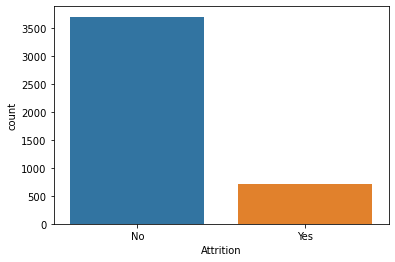

In [22]:
sns.countplot(gen_data['Attrition'])
plt.show()

### Survey Data

#### Data Head

In [23]:
emp_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [24]:
mng_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


#### Data Info

In [25]:
emp_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [26]:
mng_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [27]:
emp_survey.isna().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [28]:
any(emp_survey.duplicated())

False

In [29]:
any(mng_survey.duplicated())

False

- There are missing data in both datasets

## Preprocessing - Part 1

### General Data

#### Data Info

In [30]:
gen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

#### Removing some unnecessary variables

##### All these columns have only one value

In [31]:
gen_data.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours'], inplace = True)

#### Encoding binary features

In [32]:
gen_data['Attrition'].replace({'Yes':1,'No':0}, inplace = True)

In [33]:
gen_data['Gender'].replace({'Female':1, 'Male':0}, inplace = True)

In [34]:
gen_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,1,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,1,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,3,0,4,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,4,0,3,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,5,0,1,...,Single,23420,4.0,12,2,9.0,2,6,0,4


#### Social Class classification by monthly income

In [35]:
gen_data['MonthlyIncome'].describe()

count      4410.000000
mean      65029.312925
std       47068.888559
min       10090.000000
25%       29110.000000
50%       49190.000000
75%       83800.000000
max      199990.000000
Name: MonthlyIncome, dtype: float64

In [36]:
income_ranges = [10000, 25000, 50000, 100000, 200000, np.inf]
class_names = ['lower', 'working', 'middle', 'upper_middle', 'upper']

gen_data['SocialClass'] = pd.cut(gen_data['MonthlyIncome'], bins = income_ranges, labels = class_names)
gen_data['SocialClass'] = gen_data['SocialClass'].astype(str) 

### In-Out Data

#### Replacing NaN

In [37]:
in_time = in_time.replace(np.nan,0)

In [38]:
out_time = out_time.replace(np.nan,0)

#### Converting to Datetime type

In [39]:
in_time = in_time.apply(pd.to_datetime, errors='coerce')

In [40]:
out_time = out_time.apply(pd.to_datetime, errors='coerce')

In [41]:
in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: datetime64[ns](262)
memory usage: 8.8 MB


In [42]:
out_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: datetime64[ns](262)
memory usage: 8.8 MB


#### Groupying both in and out datasets

In [43]:
time = in_time.append(out_time)

In [44]:
#Removing the unnamed:0 column
time.drop(time.filter(regex="Unname"),axis=1, inplace=True)

#### Dropping unnecessary columns

In [45]:
time.drop(['2015-01-01', '2015-01-14','2015-01-26','2015-03-05',
             '2015-05-01','2015-07-17','2015-09-17','2015-10-02',
              '2015-11-09','2015-11-10','2015-11-11','2015-12-25'
             ], axis = 1,inplace=True) 

#### Getting the average time worked per day for each employee

In [46]:
time = time.diff(periods=4410)
time = time.iloc[4410:]

In [47]:
time['time'] = time.mean(axis = 1)

In [48]:
time['hrs'] = time['time']/np.timedelta64(1, 'h')

#### Dropping and renaming some columns

In [49]:
time.drop(time.columns.difference(['hrs']), 1, inplace=True)

In [50]:
time.reset_index(inplace = True)

In [51]:
time.rename(columns={'index': 'EmployeeID','hrs':'HoursDay'},inplace=True)
time.head()

,EmployeeID,HoursDay
0,0,6.870229
1,1,7.315971
2,2,6.816081
3,3,6.789215
4,4,7.877561


### Merging Data

In [52]:
df = gen_data.merge(emp_survey , on = 'EmployeeID', how = 'left')

In [53]:
df = df.merge(mng_survey , on = 'EmployeeID', how = 'left')

In [54]:
df = df.merge(time, on = 'EmployeeID', how = 'left')

In [55]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,SocialClass,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,HoursDay
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,1,...,1,0,0,upper_middle,3.0,4.0,2.0,3,3,7.315971
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,2,1,1,...,5,1,4,working,3.0,2.0,4.0,2,4,6.816081
2,32,0,Travel_Frequently,Research & Development,17,4,Other,3,0,4,...,5,0,3,upper_middle,2.0,2.0,1.0,3,3,6.789215
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,4,0,3,...,8,7,5,middle,4.0,4.0,3.0,2,3,7.877561
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,5,0,1,...,6,0,4,lower,4.0,1.0,3.0,3,3,10.275802


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   int64  
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  PercentSalaryHike       

## Exploratory Data Analysis - Part 2

### Separing Categorical and Numerical Variables

In [57]:
cols = []
cols_num = []

def sep_by_dtype(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            cols.append(col)
        elif data[col].dtype == 'int':
            cols_num.append(col)
        elif data[col].dtype == 'float':
            cols_num.append(col)

sep_by_dtype(df)

In [58]:
df_cat = df[cols]

In [59]:
df_num = df[cols_num]

### Exploring Categorical Variables

In [60]:
df_cat.head()

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,SocialClass
0,Travel_Rarely,Sales,Life Sciences,Healthcare Representative,Married,upper_middle
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Single,working
2,Travel_Frequently,Research & Development,Other,Sales Executive,Married,upper_middle
3,Non-Travel,Research & Development,Life Sciences,Human Resources,Married,middle
4,Travel_Rarely,Research & Development,Medical,Sales Executive,Single,lower


#### Univariate Analysis

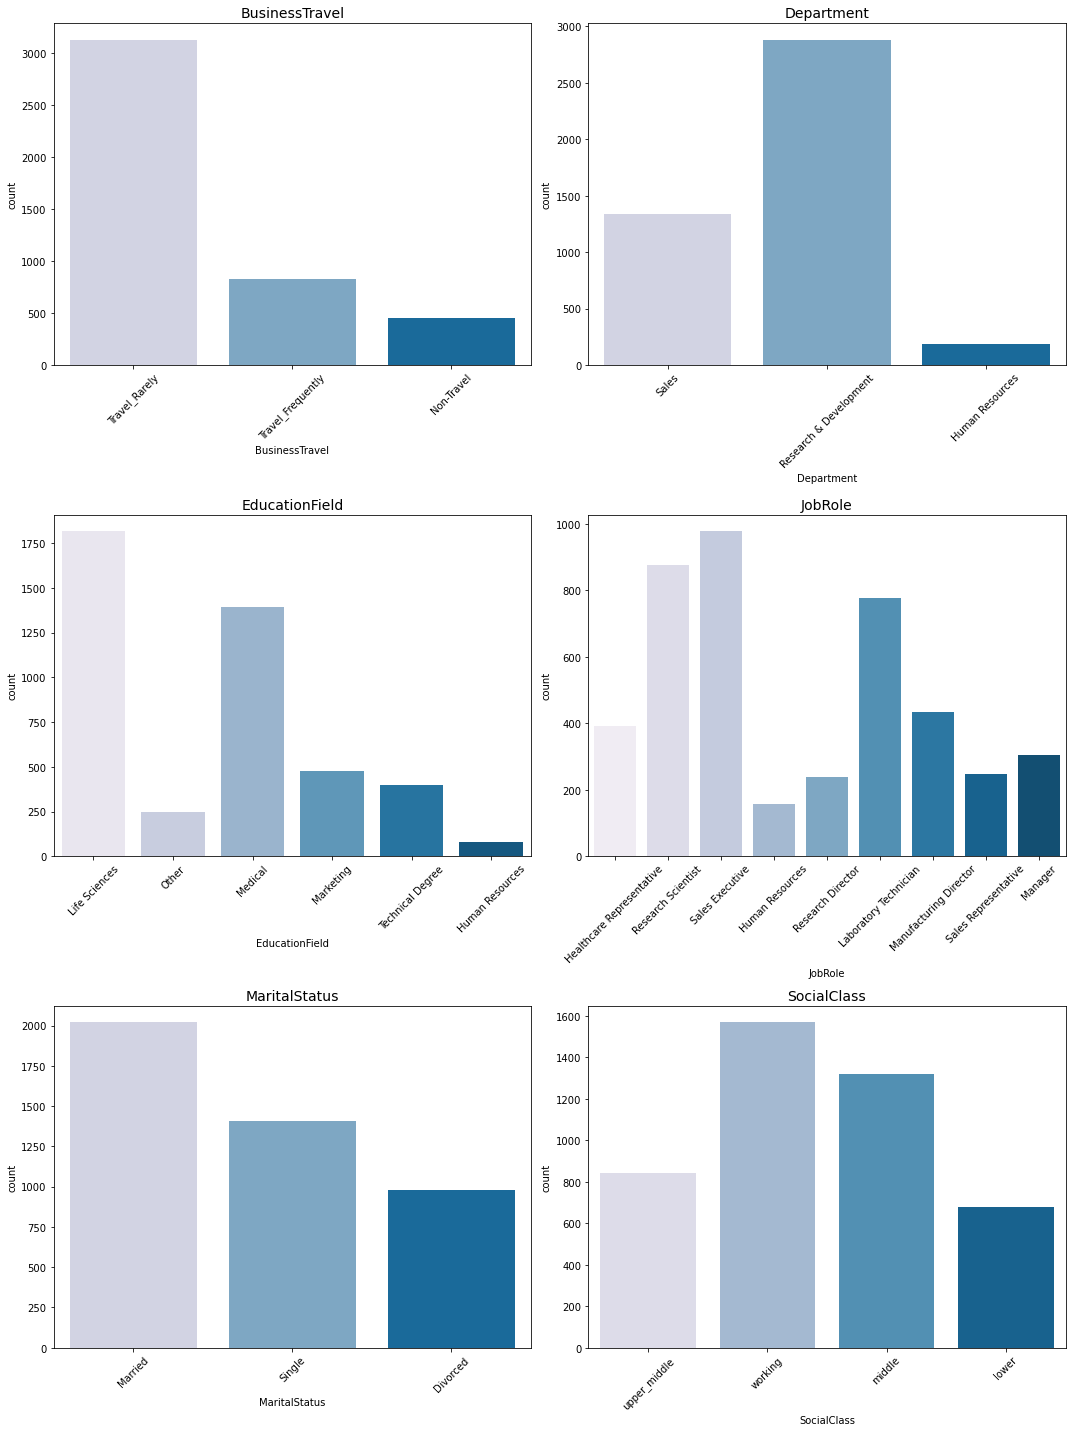

In [61]:
features = cols
plt.figure(figsize = (15, 20))
for i in range(0, len(cols)):
    plt.subplot(3, 2, i+1)    
    sns.countplot(data = df_cat, x = features[i], palette = "PuBu")
    plt.title(features[i], fontsize = 14)
    plt.xticks(rotation = 45)
    plt.tight_layout()

##### Observations

- Most employees rarely travel;
- There are few employees in HR;
- R&D department concentrates most employees;
- Most employees are based on science and health education;
- Sales Executive, Research Scientist and Laboratory Technician are the most common roles;
- Most employees are married;
- Most employees are in the middle and working class.

#### Bivariate Analysis

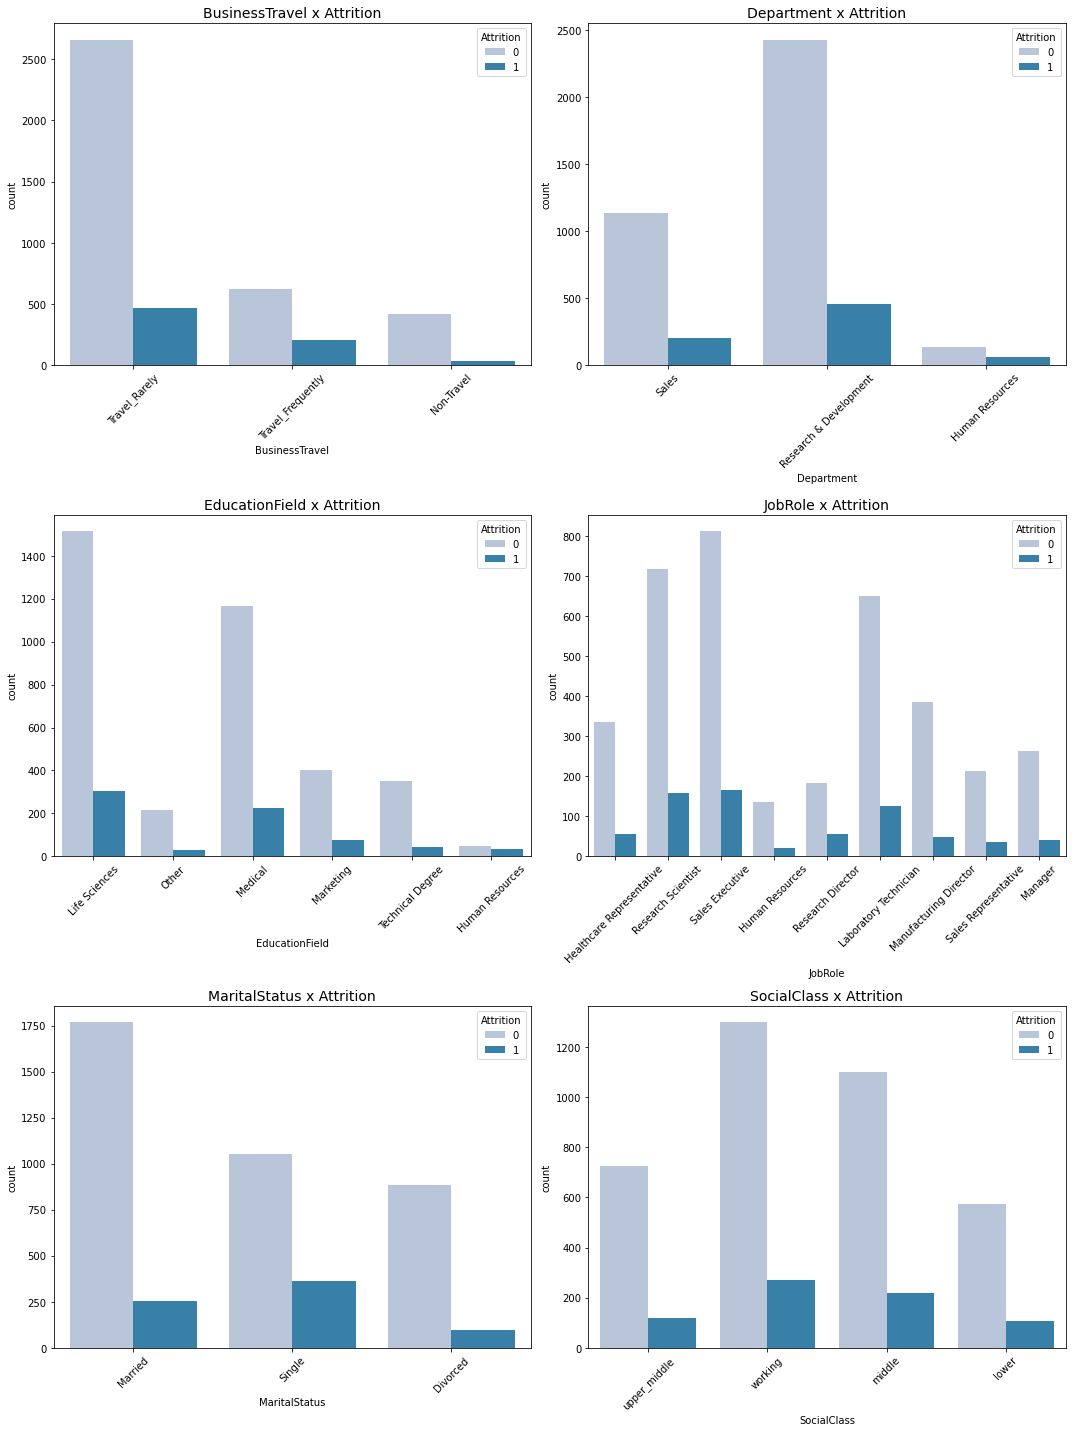

In [62]:
features = cols
plt.figure(figsize = (15, 20))
for i in range(0, len(cols)):
    plt.subplot(3, 2, i+1)    
    sns.countplot(data = df_cat, x = features[i], hue = df['Attrition'], palette = "PuBu")
    plt.xticks(rotation = 45, fontsize = 10)
    plt.title('{} x Attrition'.format(features[i]), fontsize = 14)
    plt.tight_layout()

### Exploring Numerical Variables

#### Univariate Analysis

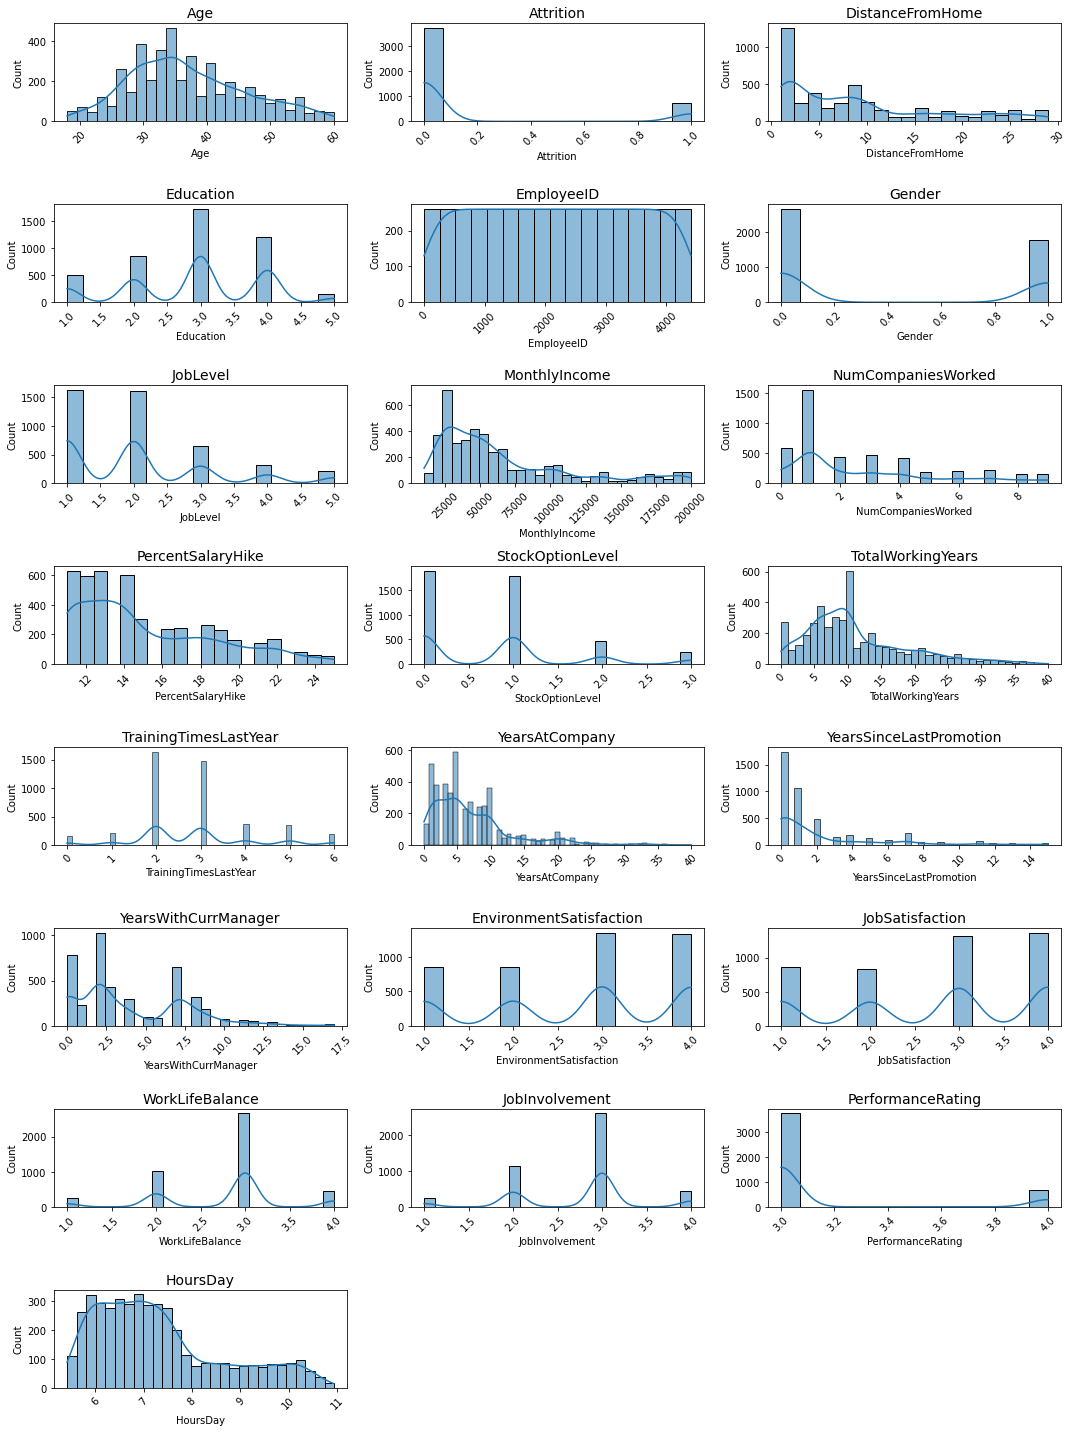

In [63]:
features = cols_num
plt.figure(figsize = (15, 20))
for i in range(0, len(cols_num)):
    plt.subplot(8,3, i+1)    
    sns.histplot(data = df_num, x = features[i], palette = "PuBu", kde = True)
    plt.title(features[i], fontsize = 14)
    plt.xticks(rotation = 45)
    plt.tight_layout()

#### Bivariate Analysis

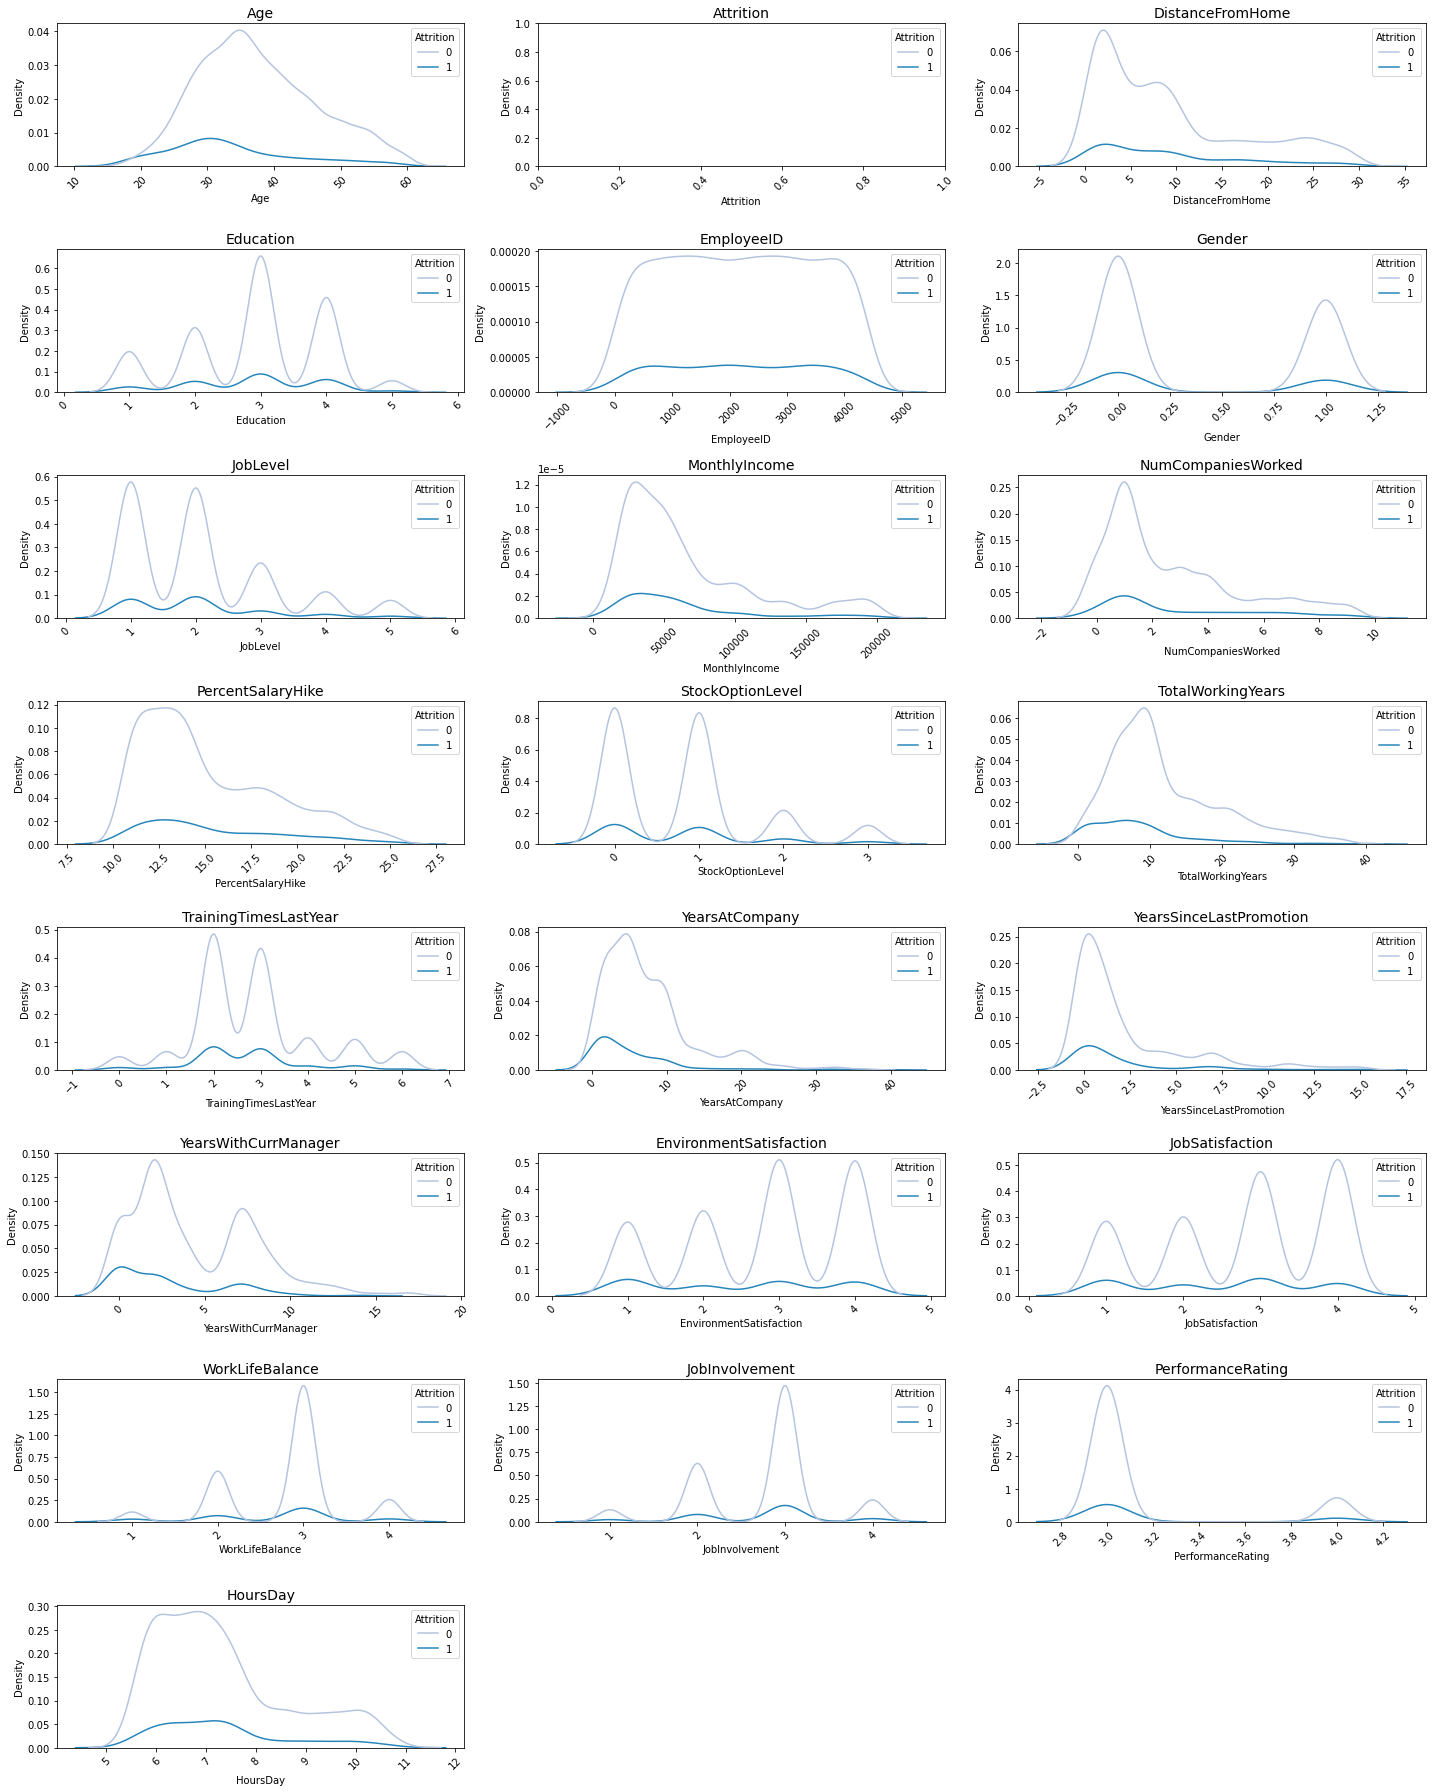

In [64]:
features = cols_num
plt.figure(figsize = (20, 25))
for i in range(0, len(cols_num)):
    plt.subplot(8,3, i+1)    
    sns.kdeplot(data = df_num, x = features[i], hue = df_num['Attrition'], palette = "PuBu")
    plt.title(features[i], fontsize = 14)
    plt.xticks(rotation = 45)
    plt.tight_layout()

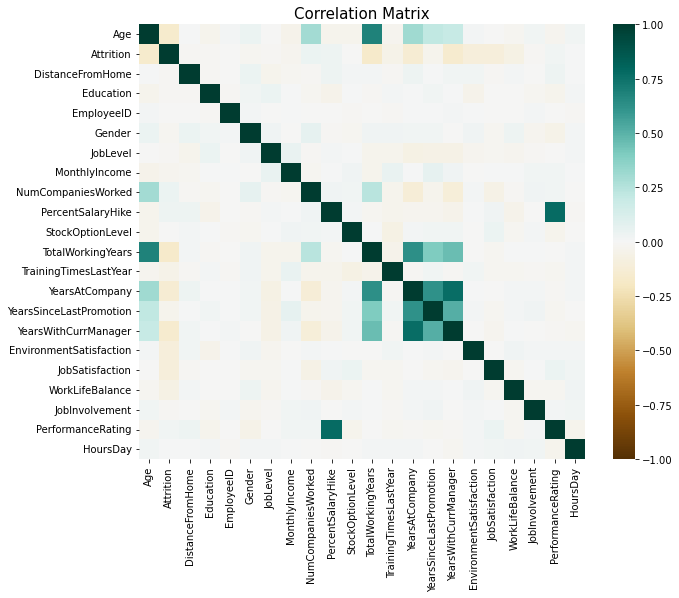

In [65]:
corr = df.corr(method = 'pearson')

plt.figure(figsize = (10,8))
sns.heatmap(data = corr, cmap = 'BrBG', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize = 15)
plt.show()

### Insights:

- The attrition rate of employees who travel frequently is higher than in other cases;
- Even thought that most attrition occur in the R&D department, the attrition rate of the HR department is higher;
- From the education field point of view, almost all the employees that are based on HR studies left the company;
- Most attrition occurr with middle class employees.

## Preprocessing - Part 2

### Handling Missing Data

In [66]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
SocialClass                 0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
HoursDay                    1
dtype: int64

In [67]:
def hand_missing_num_val(data):
    """ This function handles missing values by imputing the mean """
    for col in data.columns:
        if data[col].dtype != 'object':
            # Impute with the most frequent value
            data.fillna(data[col].mean(), inplace = True)

In [68]:
hand_missing_num_val(df)

In [69]:
df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
SocialClass                0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
HoursDay                   0
dtype: int64

### Handling Categorical Data

In [70]:
a = pd.get_dummies(df[cols])
data = df.drop(columns = cols, axis = 1, inplace = True)
data = pd.concat([df, a], axis = 1)

In [71]:
data.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,SocialClass_lower,SocialClass_middle,SocialClass_upper_middle,SocialClass_working
0,51,0,6,2,1,1,1,131160,1.0,11,...,0,0,0,0,1,0,0,0,1,0
1,31,1,10,1,2,1,1,41890,0.0,23,...,1,0,0,0,0,1,0,0,0,1
2,32,0,17,4,3,0,4,193280,1.0,15,...,0,1,0,0,1,0,0,0,1,0
3,38,0,2,5,4,0,3,83210,3.0,11,...,0,0,0,0,1,0,0,1,0,0
4,32,0,10,1,5,0,1,23420,4.0,12,...,0,1,0,0,0,1,1,0,0,0


### Feature Scaling

In [72]:
X = data.drop(columns = 'Attrition', axis = 1)
Y = data['Attrition']

In [73]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

### Feature Selection

#### RFECV to conduct recursive feature elimination using cross validation

In [74]:
rfecv = RFECV(estimator = LogisticRegression(), 
              step = 1, 
              cv = StratifiedKFold(10),
              scoring = 'f1')
rfecv.fit(X, Y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='f1')

In [75]:
print("Optimum number of features: %d" % rfecv.n_features_)

Optimum number of features: 48


#### Selecting only the relevant features

In [76]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [77]:
selected_features = rfecv.get_support(1)
data2 = data[data.columns[selected_features]]

In [78]:
data2.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,SocialClass_lower,SocialClass_middle,SocialClass_upper_middle
0,51,0,6,2,1,1,1,131160,1.0,11,...,0,0,0,0,0,1,0,0,0,1
1,31,1,10,1,2,1,1,41890,0.0,23,...,0,1,0,0,0,0,1,0,0,0
2,32,0,17,4,3,0,4,193280,1.0,15,...,0,0,1,0,0,1,0,0,0,1
3,38,0,2,5,4,0,3,83210,3.0,11,...,0,0,0,0,0,1,0,0,1,0
4,32,0,10,1,5,0,1,23420,4.0,12,...,0,0,1,0,0,0,1,1,0,0


#### Scaling the selected features

In [79]:
scaler = StandardScaler().fit(data2)
X = scaler.transform(data2)

## Machine Learning

### Train and Test Data

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42, stratify = data['Attrition'])

### Algorithms Comparisson

In [81]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

# Evaluating each model in a loop
results = []
names = []

for name, model in models:
    
    model = model
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    report = classification_report(y_test, pred)
    
    print(name, report, '\n')

LR               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1221
           1       1.00      1.00      1.00       235

    accuracy                           1.00      1456
   macro avg       1.00      1.00      1.00      1456
weighted avg       1.00      1.00      1.00      1456
 

KNN               precision    recall  f1-score   support

           0       0.94      0.99      0.97      1221
           1       0.94      0.69      0.79       235

    accuracy                           0.94      1456
   macro avg       0.94      0.84      0.88      1456
weighted avg       0.94      0.94      0.94      1456
 

DTC               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1221
           1       1.00      1.00      1.00       235

    accuracy                           1.00      1456
   macro avg       1.00      1.00      1.00      1456
weighted avg       1.00      1.00      1.00      1456
 

SV